## Nahrání dat ze souboru a jejich zobrazení v grafu

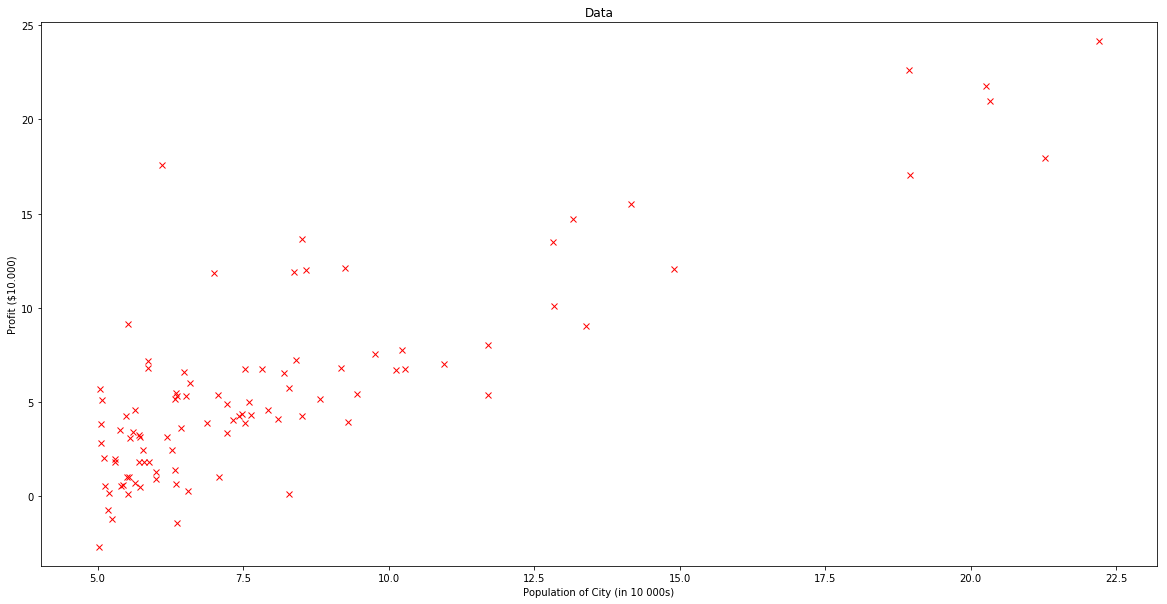

In [2]:
from lin_reg import LinRegression
import matplotlib.pyplot as plt
import numpy as np
import math

alpha = 0.2

reg = LinRegression()
reg.load_data()
reg.draw_data()
    

Hledáme přímku theta o rovnici: 

f(x) = C0 + C1*x 

, která nejlépe reprezentuje data => chyba, která vznikne součtem čtverců odchylek je nejmenší. 

    # funkce predikce hypotezy theta
    def predict_y(self, x, c0, c1):
        return c0 + x * c1
    
    
    # Funkce pro výpočet chyby
    def compute_error(self, c0, c1):
        sum_sq = 0
        for x, y in self.data:
            sum_sq += (self.predict_y(x, c0, c1) - y)**2

        return sum_sq/float(self.count*2)

Přímka theta generuje chybu v závislosti na 2 parametrech C1 a C0.
C1 představuje úhel přímky a osy x.
C0 představuje posunutí průsečíku přímky s osou y.
Hledáme takovou kombinaci parametrů C0 a C1, kdy chyba je nejmenší.
Začneme s libovolnými hodnotami parametrů tedy např. C0=0 a C1=0.
Vypočítáme gradient v tomto bodě - tj. parciální derivace podle c0 a c1.
Gradient je vektor, který má směr největšího růstu. Tento vektor ještě znormalizujeme, abychom měli čistě směr.
Vydáme se opačným směrem, protože hledáme minimum. 

    # Funkce počítající gradient
    def compute_grad(self):
        c0_grad = 0
        c1_grad = 0
        for x, y in self.data:
            c0_grad -= self.predict_y(x, self.theta.c0, self.theta.c1) - y
            c1_grad -= x * (self.predict_y(x, self.theta.c0, self.theta.c1) - y)

        c0_grad = c0_grad / float(self.count)
        c1_grad = c1_grad / float(self.count)
        size = math.sqrt(c0_grad ** 2 + c1_grad ** 2)
        return c0_grad/size, c1_grad/size   # normalized

Tedy k výchozímu bodu přičteme opačnou hodnotu gradientu vynásobenou velikostí kroku alpha a znovu spočítáme chybu.


c0 = 0
c1 = 0
alpha = 0.2

dx, dy = self.compute_grad()
c0 += dx*alpha
c1 += dy*alpha
err = self.compute_error(c0, c1)

Tento postup budeme opakovat v cyklu, dokud chyba bude klesat a rozdíl mezi dvěmi po sobě následujícími 
chybami bude větší než požadovaná přesnost eta = 0.0001


    def find_minimum(self, alpha=0.2):
        """
        using Gradient Descent
        """
        c0 = 0
        c1 = 0
        self.alpha = alpha
        err = reg.compute_error(0, 0)
        self.errors.append(err)
        self.thetas.append((0, 0))

        while True:
            dx, dy = self.compute_grad()
            c0 += dx*alpha
            c1 += dy*alpha
            err = self.compute_error(c0, c1)

            self.theta.update(c0, c1)
            self.errors.append(err)
            self.thetas.append((c0, c1))
            self.iteration += 1
            self.print_row(err)
            if self.errors[-2] < self.errors[-1]:
                alpha = alpha * 0.5

            if abs(self.errors[-2] - self.errors[-1]) < 0.0001:
                # STOP
                break

I:1 alpha: 0.2000  C0:0.00000, C1:0.00000, Error: 32.07273
I:2 alpha: 0.2000  C0:0.01781, C1:0.19921, Error: 20.59915
I:3 alpha: 0.2000  C0:0.03488, C1:0.39848, Error: 12.41390
I:4 alpha: 0.2000  C0:0.05049, C1:0.59787, Error: 7.51628
I:5 alpha: 0.2000  C0:0.06168, C1:0.79755, Error: 5.90281
I:6 alpha: 0.2000  C0:-0.13654, C1:0.77087, Error: 5.84719
I:7 alpha: 0.2000  C0:-0.15351, C1:0.97015, Error: 6.69516
I:8 alpha: 0.2000  C0:-0.16885, C1:0.87133, Error: 5.85102
I:9 alpha: 0.2000  C0:-0.19410, C1:0.77457, Error: 5.81591
I:10 alpha: 0.2000  C0:-0.20152, C1:0.87429, Error: 5.82765
I:11 alpha: 0.2000  C0:-0.21412, C1:0.82591, Error: 5.71110
I:12 alpha: 0.2000  C0:-0.26287, C1:0.81481, Error: 5.68654
I:13 alpha: 0.2000  C0:-0.28441, C1:0.85993, Error: 5.69826
I:14 alpha: 0.2000  C0:-0.29329, C1:0.83656, Error: 5.65932
I:15 alpha: 0.2000  C0:-0.31525, C1:0.82462, Error: 5.64777
I:16 alpha: 0.2000  C0:-0.33015, C1:0.84470, Error: 5.63775
I:17 alpha: 0.2000  C0:-0.34763, C1:0.82683, Error: 5.62760
I:18 alpha: 0.2000  C0:-0.36130, C1:0.84777, Error: 5.61758
I:19 alpha: 0.2000  C0:-0.37876, C1:0.82988, Error: 5.60764
I:20 alpha: 0.2000  C0:-0.39225, C1:0.85093, Error: 5.59779
I:21 alpha: 0.2000  C0:-0.40959, C1:0.83292, Error: 5.58802
                    
...

I:540 alpha: 0.2000  C0:-3.53826, C1:1.16965, Error: 4.49493
I:541 alpha: 0.2000  C0:-3.54231, C1:1.14499, Error: 4.49482
I:542 alpha: 0.2000  C0:-3.54138, C1:1.16997, Error: 4.49472
I:543 alpha: 0.2000  C0:-3.54542, C1:1.14530, Error: 4.49463

Regresni primka: Y = 1.15X + -3.55

                    

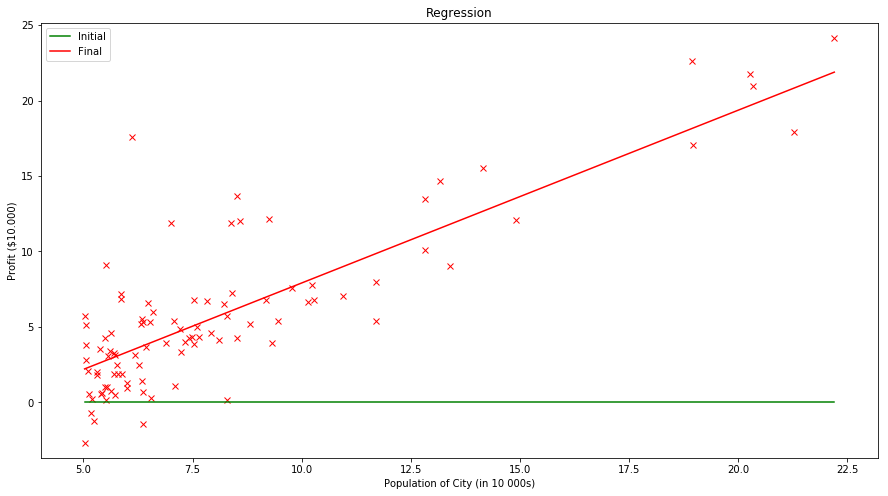

In [2]:
from lin_reg import LinRegression
import matplotlib.pyplot as plt
import numpy as np
import math


alpha = 0.2

reg = LinRegression()
reg.load_data()
reg.draw_data()
reg.find_minimum(alpha=alpha)
reg.draw_hypoteza()
plt.legend()
plt.show()

    

Je zajímavé zobrazit jakou křivku opisuje gradient, tedy cestu klesání k minimu.

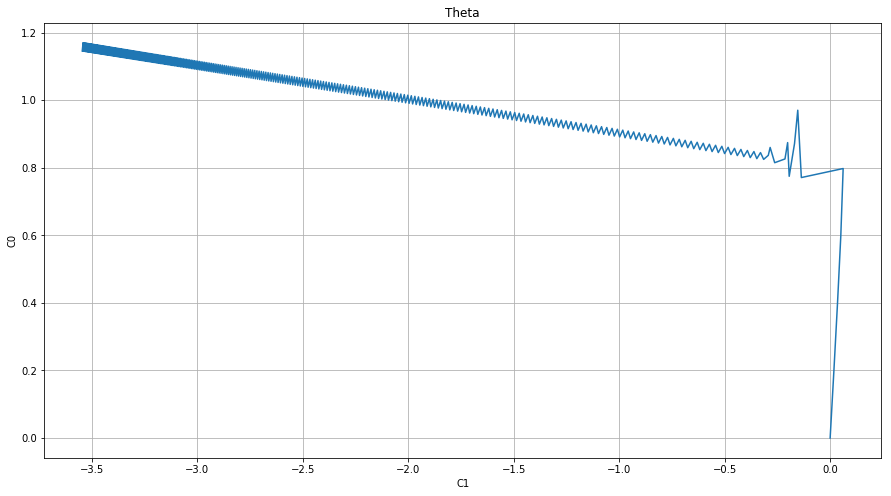

In [2]:
from lin_reg import LinRegression
import matplotlib.pyplot as plt
import numpy as np
import math


alpha = 0.2

reg = LinRegression()
reg.load_data()
reg.find_minimum(alpha=alpha)
reg.draw_theta()
plt.show()

Zde vidíme jak se měnila chyba.

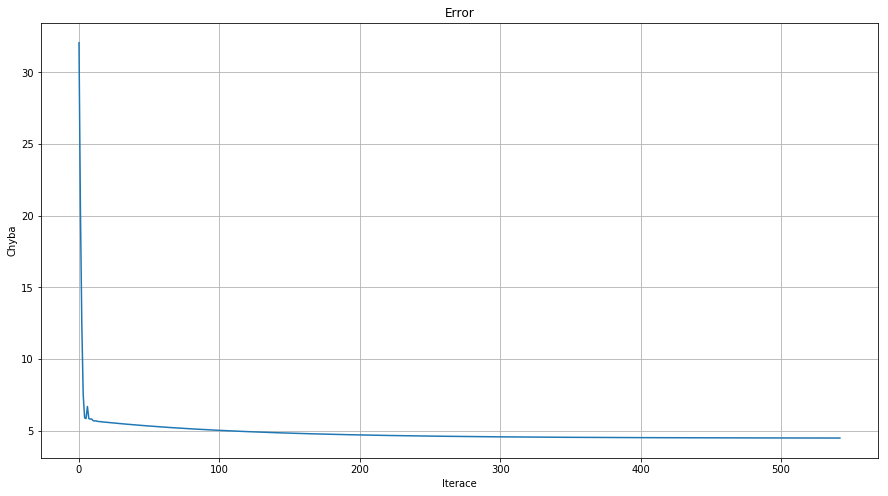

In [3]:
from lin_reg import LinRegression
import matplotlib.pyplot as plt
import numpy as np
import math


alpha = 0.2

reg = LinRegression()
reg.load_data()
reg.find_minimum(alpha=alpha)
reg.draw_error()
plt.show()

# funkce predikce hypotezy theta
    def predict_y(self, x, c0, c1):
        return c0 + x * c1
    
    
    # Funkce pro výpočet chyby
    def compute_error(self, c0, c1):
        sum_sq = 0
        for x, y in self.data:
            sum_sq += (self.predict_y(x, c0, c1) - y)**2

        return sum_sq/float(self.count*2)
        
y = c0 + c1*x

       1/2m *  (c0 + x * c1 - y)**2
       
       E(c0 + x * c1 - y) * x = 0 =>   c1 * E(xx)  +  c0 * E(x) = E(xy)
       E(c0 + x * c1 - y) * 1 = 0 =>   c1 * E(x)   +  c0 * n    = E(y) 
        
       
       c0  =  [E(y) - (c1 * E(x))]  / n
       
       c1 * E(xx)  +  {E(y)/n - (c1 * E(x))/ n} * E(x) = E(xy)
      
      